In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import time
import os
import tensorflow.keras.callbacks as keras_callbacks
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2024-04-23 09:56:45.869990: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 09:56:45.870092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 09:56:46.020661: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Загрузка и обработка данных

In [3]:
IMG_SIZE = 128

dataset_directory = '/kaggle/input/dogsvcatsds/dataset'

In [4]:
dog_images = []
cat_images = []

def load_image(file_path):
    image = Image.open(file_path)
    image = image.resize((IMG_SIZE, IMG_SIZE)) # Изменить размеры изображения до стандарта
    image = np.array(image) / 255.0  # Нормализация
    return image

for file_name in os.listdir(dataset_directory):
    if file_name.startswith('dog.'):
        file_path = os.path.join(dataset_directory, file_name) # Соединить адрес папки и нужного файла
        dog_images.append(load_image(file_path)) # Добавить адрес соответствующий массив
    elif file_name.startswith('cat.'):
        file_path = os.path.join(dataset_directory, file_name) # Соединить адрес папки и нужного файла
        cat_images.append(load_image(file_path)) # Добавить адрес соответствующий массив

# Превратить адреса в массивы numpy
dog_images = np.array(dog_images)
cat_images = np.array(cat_images)

# Показать количество изображений каждой категории
print("Количество фотографий собак:", len(dog_images))
print("Количество фотографий котов:", len(cat_images))

Количество фотографий собак: 5001
Количество фотографий котов: 5001


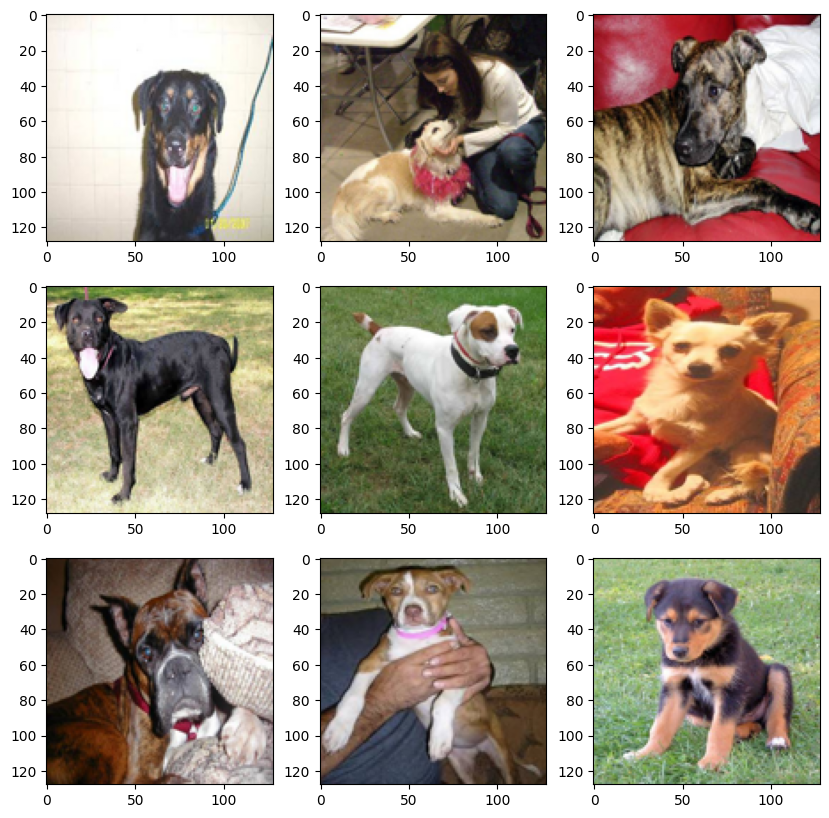

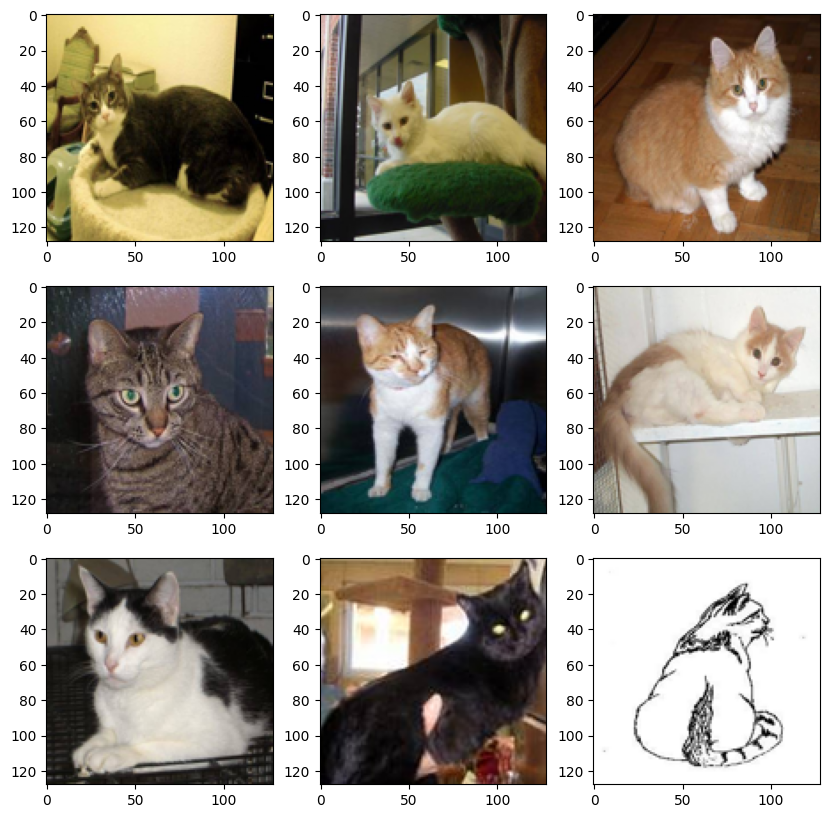

In [5]:
def display_images(images, title): # Функция для показа 9 изображений из указанного массива
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
    plt.show()

# Использование функции
display_images(dog_images, title='Dog image examples')
display_images(cat_images, title='Cat image examples')

# Подготовка и разделение данных

In [6]:
dog_labels = np.ones(len(dog_images), dtype=np.uint8)  # 1 для отметки собак
cat_labels = np.zeros(len(cat_images), dtype=np.uint8)  # 0 для отметки котов

X = np.concatenate([dog_images, cat_images], axis=0)
y = np.concatenate([dog_labels, cat_labels], axis=0)

In [7]:
del dog_images, cat_images, dog_labels, cat_labels # Освобождение памяти ОЗУ

In [8]:
X.shape

(10002, 128, 128, 3)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (8001, 128, 128, 3)
y_train shape: (8001,)
X_test shape: (2001, 128, 128, 3)
y_test shape: (2001,)


# Создание и компиляция CNN модели

In [25]:
from keras.layers import Input

input_shape = (128, 128, 3)
first_model = Sequential([
    Input(shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid', name='output_layer')
])

In [26]:
first_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Тренировка и оценка модели

In [27]:
callback = keras_callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = first_model.fit(X_train, y_train, epochs=30, batch_size=16,
                          validation_data=(X_test, y_test),
                          callbacks=[callback])

Epoch 1/30
  9/501 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4990 - loss: 0.8782

W0000 00:00:1713868526.750841     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


501/501 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5561 - loss: 0.6917

W0000 00:00:1713868537.009607     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


501/501 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.5562 - loss: 0.6916 - val_accuracy: 0.6517 - val_loss: 0.6118
Epoch 2/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6555 - loss: 0.6275 - val_accuracy: 0.7086 - val_loss: 0.5824
Epoch 3/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7170 - loss: 0.5549 - val_accuracy: 0.7386 - val_loss: 0.5119
Epoch 4/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7729 - loss: 0.4790 - val_accuracy: 0.7616 - val_loss: 0.5006
Epoch 5/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8273 - loss: 0.3877 - val_accuracy: 0.7826 - val_loss: 0.4863
Epoch 6/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8612 - loss: 0.3223 - val_accuracy: 0.7906 - val_loss: 0.4918
Epoch 7/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9020 - loss: 0.2288 - val_accuracy: 0.7901 - val_loss: 0.5011
Epoch 8/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9402 - loss: 0.1597 - val_accuracy: 0.80

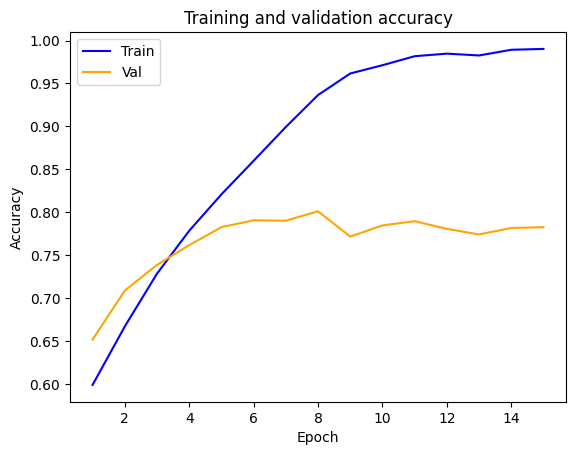

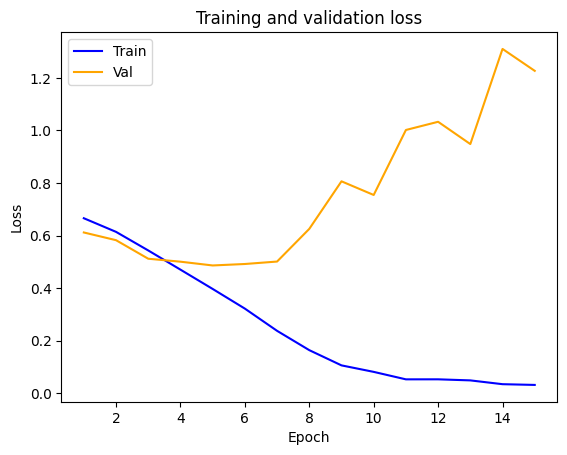

In [28]:
def plot(history): # График для сравнения и оценки результатов
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

plot(history)

In [29]:
y_pred = first_model.predict(X_test)

y_pred_labels = (y_pred > 0.5).astype(int)
y_true_labels = y_test

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


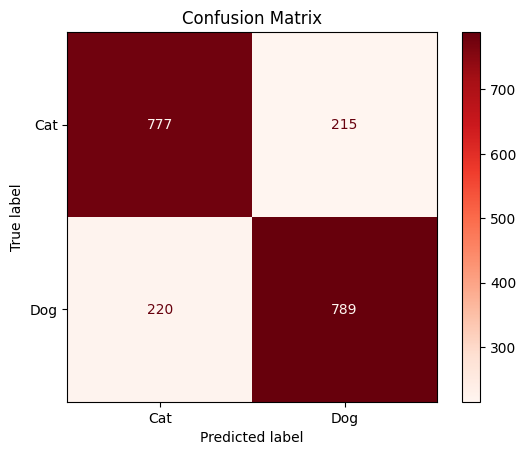

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmatrix = confusion_matrix(y_true_labels, y_pred_labels)

classes = ['Cat', 'Dog']
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=classes)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()

# Сохранение модели

In [32]:
first_model.save("/kaggle/working/model_2.keras")